In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [26]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Resize(384),
                                transforms.RandomCrop(224),
                                transforms.RandomHorizontalFlip(0.5),
                                transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
])

In [27]:
train_data = dsets.CIFAR10(root='CIFAR10', train=True, transform=transform, download=True)

Files already downloaded and verified


In [28]:
print(f'이미지 개수: {len(train_data)}')

이미지 개수: 50000


In [29]:
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, drop_last=True)

In [30]:
print(f'총 mini-batch 개수: {len(train_loader)}')

총 mini-batch 개수: 390


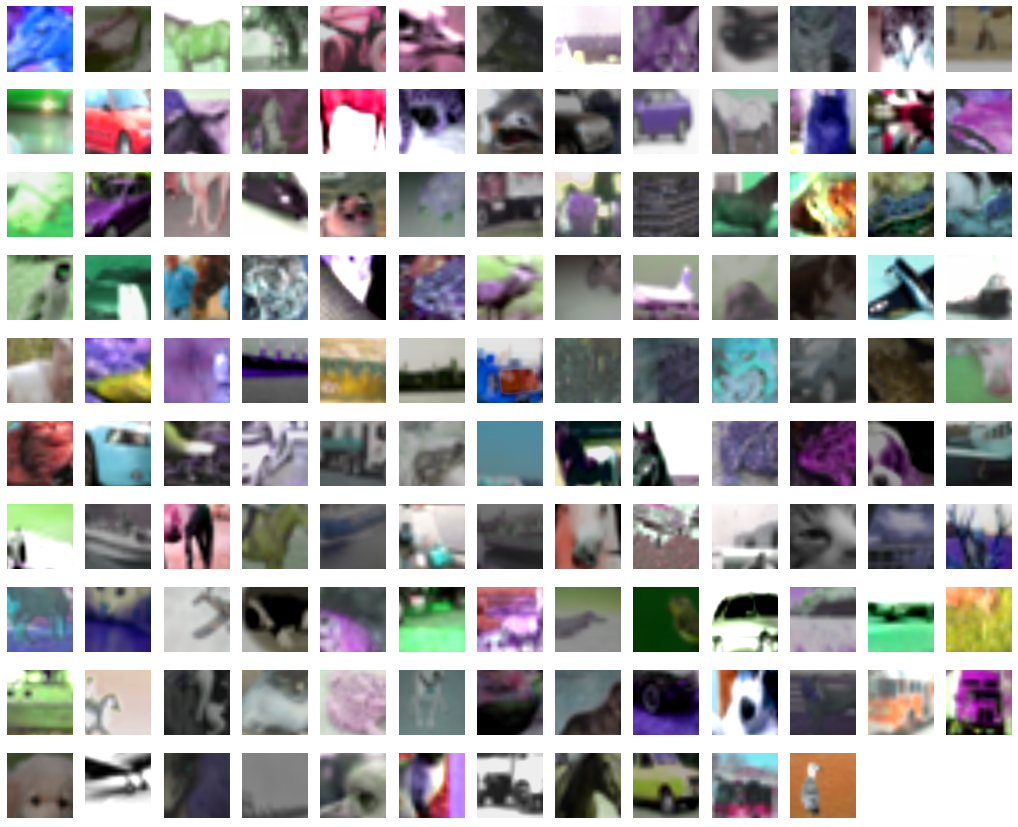

In [31]:
for index, (images, labels) in enumerate(train_loader):
    if index == 0:
        fig, axs = plt.subplots(10, 13, figsize=(18, 15))
        for i in range(10):
            for j in range(13):
                if i*13+j < 128:
                    image = images[i*13+j].numpy()
                    axs[i][j].imshow(np.transpose(image, (1, 2, 0)))
                axs[i][j].axis('off')
        break